### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [40]:
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#### Add an overweight column

In [41]:
overweight = (df['weight']/((df['height']/100)** 2) > 25).astype(int)
df['overweight'] = overweight

In [42]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


#### Normalize data as 0s and 1s

In [43]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

In [44]:
df['gluc'] = (df['gluc'] > 1).astype(int)

In [45]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


#### Convert data as long format

In [46]:
df_cat = df.melt(id_vars =['cardio'], value_vars = sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']))

#### Count plot

In [47]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


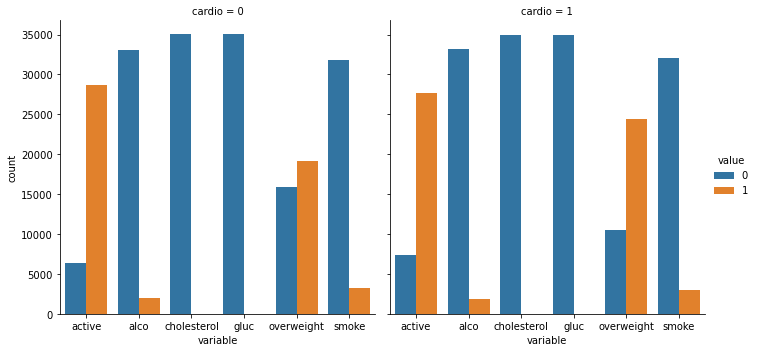

In [18]:
sns.catplot(x = 'variable', col = 'cardio', hue = 'value', kind = 'count', data = df_cat)

#### Clean the data

In [48]:
df_filtered= df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] >= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.975))]

        
             

#### Create a correlation matrix

In [54]:
corr = df_filtered.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,-0.012188,0.111671,-0.029965,0.048187,-0.026623,0.042970,0.131510,0.157023,-0.090688,-0.082333,0.057980,0.120020,NaN
age,-0.012188,1.000000,-0.048596,-0.126614,-0.181946,0.052578,-0.038464,0.080378,0.128645,-0.126965,-0.157903,0.026060,-0.028979,NaN
sex,0.111671,-0.048596,1.000000,0.011357,-0.035412,0.091724,0.099973,0.075377,0.020048,0.055771,0.042515,0.000367,0.150484,NaN
height,-0.029965,-0.126614,0.011357,1.000000,0.043489,-0.038394,-0.145563,0.120100,0.087128,-0.056071,0.002651,0.006671,0.054429,NaN
weight,0.048187,-0.181946,-0.035412,0.043489,1.000000,0.060721,0.015350,-0.014936,-0.006863,0.032030,0.007574,-0.037236,0.141731,NaN
ap_hi,-0.026623,0.052578,0.091724,-0.038394,0.060721,1.000000,0.678395,0.019274,0.003849,0.065904,-0.047375,-0.077298,0.339058,NaN
ap_lo,0.042970,-0.038464,0.099973,-0.145563,0.015350,0.678395,1.000000,-0.012035,-0.078835,0.015160,0.006066,-0.063553,0.309432,NaN
cholesterol,0.131510,0.080378,0.075377,0.120100,-0.014936,0.019274,-0.012035,1.000000,0.384156,0.109093,0.065020,0.150362,0.121387,NaN
gluc,0.157023,0.128645,0.020048,0.087128,-0.006863,0.003849,-0.078835,0.384156,1.000000,0.057764,0.141422,0.061242,-0.088580,NaN
smoke,-0.090688,-0.126965,0.055771,-0.056071,0.032030,0.065904,0.015160,0.109093,0.057764,1.000000,0.349884,-0.181541,0.013404,NaN


In [50]:
#mask = np.triu(corr)

In [51]:
#mask

array([[ 1.00000000e+00, -1.21875770e-02,  1.11671204e-01,
        -2.99648246e-02,  4.81871400e-02, -2.66225302e-02,
         4.29697996e-02,  1.31510323e-01,  1.57023465e-01,
        -9.06879744e-02, -8.23328330e-02,  5.79803822e-02,
         1.20020431e-01,             nan],
       [ 0.00000000e+00,  1.00000000e+00, -4.85961371e-02,
        -1.26614237e-01, -1.81945593e-01,  5.25782969e-02,
        -3.84635851e-02,  8.03780325e-02,  1.28645107e-01,
        -1.26964959e-01, -1.57903269e-01,  2.60602525e-02,
        -2.89794902e-02,             nan],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.13569714e-02, -3.54123885e-02,  9.17236628e-02,
         9.99733541e-02,  7.53766082e-02,  2.00476251e-02,
         5.57711679e-02,  4.25145048e-02,  3.66786923e-04,
         1.50483752e-01,             nan],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  4.34891537e-02, -3.83939141e-02,
        -1.45562803e-01,  1.20100135e-01,  8.

In [53]:
##ax = sns.heatmap(corr, annot = True, fmt = '.1f', linewidths = 1, mask = mask, vmax = 8, center = 0.09, square = True, cbar_kws = {'shrink': 0.5})

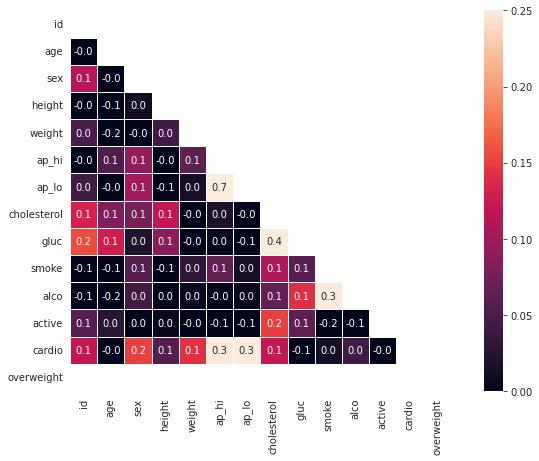

In [55]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, fig = plt.subplots(figsize = (12, 7))
    fig = sns.heatmap(corr, vmin=0, vmax= .25, square = True, annot = True, linewidths = .5, fmt = '.1f', mask = mask)
    